In [1]:
import os
import cv2
import numpy as np
import pandas as pd

In [2]:
os.listdir('Data/PetorcaSAT')

['built', 'crop', 'grass', 'tiles', 'water']

In [3]:
def images_to_df(folder_path):
    images = []
    filenames = []
    labels = []
    img_size=False
    for type in os.listdir(folder_path):
        type_path = os.path.join(folder_path, type)
        if type == 'tiles':
            pass
        else:
            for filename in os.listdir(type_path):
                img_path = os.path.join(folder_path, type, filename)
                if os.path.isfile(img_path):
                    img = cv2.imread(img_path)
                    if img is not None:
                        if not img_size:
                            print(img.shape)
                            img_size=True
                        images.append(img.flatten().tolist())
                        filenames.append(filename)
                        labels.append(type)
    return images, filenames, labels

folder_path = os.path.join('Data', 'PetorcaSAT')

images, filenames, labels = images_to_df(folder_path)

image_arrays = np.array(images)
print(image_arrays.shape)


(100, 100, 3)
(200, 30000)


In [4]:
df = pd.DataFrame.from_records(image_arrays)
print(df)

     0      1      2      3      4      5      6      7      8      9      \
0      138    142    153    143    147    158    148    153    162    150   
1      159    166    175    159    166    175    158    164    171    150   
2      170    172    160    156    160    148    156    159    150    198   
3      178    199    207    195    216    224    213    232    239    215   
4      123    129    142    129    135    148    135    141    154    136   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
195    118    106    102    119    107    103    119    107    103    120   
196    166    159    142    143    135    118    118    108     90    107   
197    113    102     94    117    106     98    121    109    103    120   
198    179    183    178    170    174    169    170    174    168    179   
199    155    164    178    149    158    172    144    153    167    145   

     ...  29990  29991  29992  29993  29994  29995  29996  29997  29998  29

In [5]:
df['filename'] = filenames
df['labels'] = labels
columns = list(df.columns)
columns = columns[-2:]+columns[:-2]
df = df[columns]

In [6]:
df['labels'].unique()

array(['built', 'crop', 'grass', 'water'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 30002 entries, filename to 29999
dtypes: int32(30000), object(2)
memory usage: 22.9+ MB


In [8]:
!py -3.11 -m pip install imbalanced-learn

In [9]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, svm
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTETomek



In [10]:
X=df[[i for i in range(30000)]]
y=df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

tl = SMOTETomek()
X_train, y_train = tl.fit_resample(X_train, y_train)



In [11]:
clf = RandomForestClassifier()  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

scores_RL = cross_val_score(clf, X_test, y_test, cv=20, scoring='accuracy')
# scores_RL_tomek = cross_val_score(clf, X_test_t, y_test_t, cv=20, scoring='accuracy')
print("Normal test:", np.mean(scores_RL))
# print("Balanced test:",np.mean(scores_RL_tomek))

ACCURACY OF THE MODEL:  0.72


c:\Users\minso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(


Normal test: 0.6583333333333333


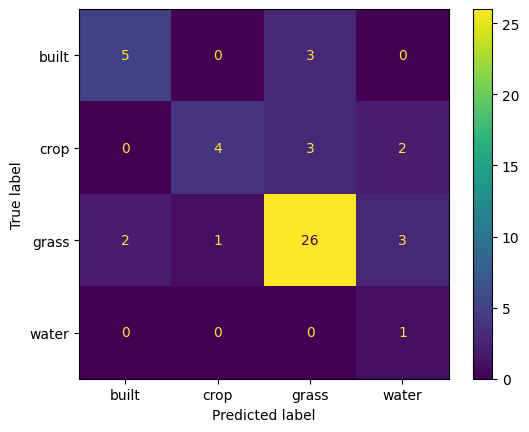

In [12]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm_plot = sklearn.metrics.ConfusionMatrixDisplay(cm, display_labels=list(df['labels'].unique()))
cm_plot.plot()


In [13]:
clf = svm.SVC(C=1)
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

scores_RL = cross_val_score(clf, X_test, y_test, cv=20, scoring='accuracy')
# scores_RL_tomek = cross_val_score(clf, X_test_t, y_test_t, cv=20, scoring='accuracy')
print("Normal test:", np.mean(scores_RL))
# print("Balanced test:",np.mean(scores_RL_tomek))

ACCURACY OF THE MODEL:  0.76


c:\Users\minso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(


Normal test: 0.625


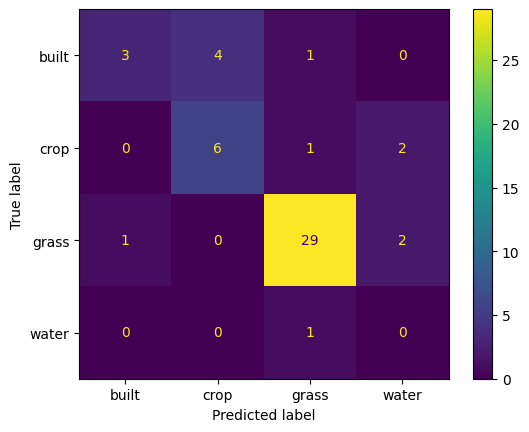

In [14]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm_plot = sklearn.metrics.ConfusionMatrixDisplay(cm, display_labels=list(df['labels'].unique()))
cm_plot.plot()